In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.metrics import confusion_matrix, accuracy_score
import itertools

In [4]:
data = pd.read_csv('./bank-additional-full.csv',sep=';')

In [5]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [7]:
data.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [8]:
#check for null values
data.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [9]:
data['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [10]:
target = data['y'].copy()
x = data.drop(['y'], axis=1)

In [12]:
data_target = data.loc[:,'y']

In [11]:
data.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [12]:
categorical_cols = x.select_dtypes(['object']).columns

In [13]:
x[categorical_cols].head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent


In [14]:
#unique variables in data
x.apply(lambda x: len(x.unique()))

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
dtype: int64

In [15]:
#convert categorical data to numerical columns using one hot encoding
x_new = pd.get_dummies(x, columns=categorical_cols)

In [16]:
x_new.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0


In [17]:
x_new.shape

(41188, 63)

In [18]:
x_new.select_dtypes(['object']).columns
#all the data is now numerical

Index([], dtype='object')

In [19]:
target.value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [20]:
y = target.map({"yes":1, "no":0})

In [21]:
#train test split
x_train, x_cv, y_train, y_cv= train_test_split(x_new, y, test_size = 0.1, stratify = y)

In [22]:
for df in[x_train, x_cv, y_train, y_cv]:
    print(df.shape)

(37069, 63)
(4119, 63)
(37069,)
(4119,)


In [23]:
clf = ExtraTreesClassifier(n_estimators=150)

In [24]:
cv = StratifiedKFold(n_splits=10, shuffle=False)
score_2 = cross_val_score(clf, x_train, y_train, cv=cv, n_jobs=-1)
print('Average accuracy: {} %'.format(np.mean(score_2)*100))

Average accuracy: 90.14538896214056 %


In [25]:
clf.fit(x_train, y_train)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [26]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        t = "%.0f"%(cm[i, j])
        print(t)
        plt.text(j, i, t,
                  horizontalalignment="center",
                  color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Accuracy is 90.34 percent
Confusion matrix, without normalization
3555
100
298
166


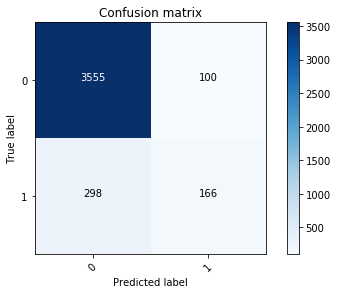

In [27]:
y_pred = clf.predict(x_cv)
print("Accuracy is %.2f percent"%(accuracy_score(y_cv, y_pred)*100))

cnf_matrix = confusion_matrix(y_cv, y_pred)
np.set_printoptions(precision=2)
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=range(len(set(y_cv))), normalize = False, title='Confusion matrix')

In [28]:
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

In [29]:
n_features = len(indices)

1. duration (0.216890)
2. euribor3m (0.081132)
3. age (0.074428)
4. campaign (0.055041)
5. pdays (0.039972)
6. nr.employed (0.032583)
7. poutcome_success (0.031181)
8. emp.var.rate (0.020358)
9. housing_yes (0.016961)
10. housing_no (0.016790)
11. job_admin. (0.015149)
12. cons.conf.idx (0.014984)
13. cons.price.idx (0.014931)
14. marital_married (0.014476)
15. education_high.school (0.013915)
16. education_university.degree (0.013567)
17. day_of_week_mon (0.013548)
18. marital_single (0.013179)
19. day_of_week_thu (0.013134)
20. day_of_week_tue (0.013118)
21. day_of_week_wed (0.012660)
22. day_of_week_fri (0.012492)
23. job_technician (0.012099)
24. loan_no (0.011637)
25. loan_yes (0.011473)
26. education_professional.course (0.010547)
27. month_may (0.009976)
28. previous (0.009932)
29. job_blue-collar (0.009615)
30. education_basic.9y (0.009535)
31. poutcome_nonexistent (0.009442)
32. marital_divorced (0.009231)
33. job_management (0.008052)
34. job_services (0.007739)
35. job_retir

(0, 0.23733266723654853)

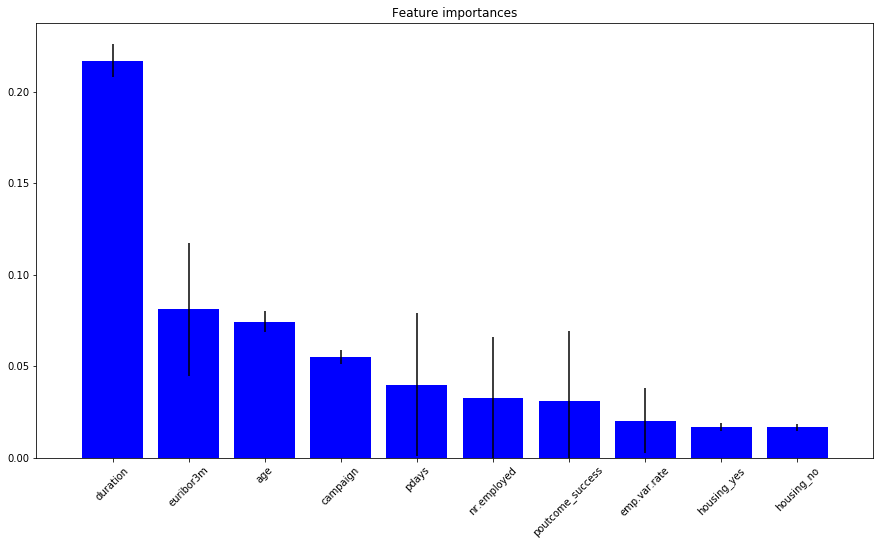

In [30]:
for f in range(n_features):
    print("%d. %s (%f)" % (f + 1, x_new.columns[indices[f]],  importances[indices[f]]))

# Plot the feature importances of the forest
fig = plt.figure()
plt.title("Feature importances")  # just the top 10 features
num_feat_to_plot = 10
plt.bar(range(num_feat_to_plot), importances[indices[:num_feat_to_plot]],
       color="b", yerr=std[indices[:num_feat_to_plot]], align="center")
plt.xticks(range(num_feat_to_plot), np.array(x_new.columns)[indices[:num_feat_to_plot]])
plt.xlim([-1, num_feat_to_plot])
plt.xticks(rotation=45)
fig.set_size_inches(15,8)
axes = plt.gca()
axes.set_ylim([0,None])